In [27]:
import numpy as np
import sys, re, fileinput, argparse

In [28]:
import pandas as pd 
import re

In [30]:
df1 = pd.read_csv(r'C:\Users\sepehr\Desktop\IR\project\IR-S19-project-data (1)\IR-S19-project-data\ir-news-0-2.csv')
df2= pd.read_csv(r'C:\Users\sepehr\Desktop\IR\project\IR-S19-project-data (1)\IR-S19-project-data\ir-news-2-4.csv')
df3= pd.read_csv(r'C:\Users\sepehr\Desktop\IR\project\IR-S19-project-data (1)\IR-S19-project-data\ir-news-4-6.csv')
df4= pd.read_csv(r'C:\Users\sepehr\Desktop\IR\project\IR-S19-project-data (1)\IR-S19-project-data\ir-news-6-8.csv')
df5= pd.read_csv(r'C:\Users\sepehr\Desktop\IR\project\IR-S19-project-data (1)\IR-S19-project-data\ir-news-8-10.csv')
df6= pd.read_csv(r'C:\Users\sepehr\Desktop\IR\project\IR-S19-project-data (1)\IR-S19-project-data\ir-news-10-12.csv')



df=pd.DataFrame()
df=df.append(df1)
df=df.append(df2)
df=df.append(df3)
df=df.append(df4)
df=df.append(df5)
df=df.append(df6)
df=df.reset_index()


In [31]:
#Data 
df

,index,publish_date,title,url,summary,source_url,meta_tags,content,category,subcategory,thumbnail
0,0,"October 20th 2019, 12:39:00.000",کشف انبار مهمات طالبان در یک مسجد ولایت قندهار,shabestan.ir,منسوبین اردوی ملی افغانستان انبار سلاح و مهمات...,shabestan.ir,"[""انبار مهمات"",""افغانستان"",""طالبان"",""مسجد""]","<strong><span dir=""RTL"">به گزارش&nbsp;<a href=...",NaN,NaN,http://media.shabestan.ir/Original/1398/08/18/...
1,1,"October 20th 2019, 11:45:00.000",دستان خالی آموزش و پرورش در اجرای وظایف/ «کاهش...,yjc.ir,NaN,yjc.ir,"[""آموزش و پرورش"",""اخبار دانش‌آموزی"",""اخبار مدا...",<p>کاهش تنوع مدارس، شعار سال‌های اخیر سکاندارا...,NaN,NaN,https://cdn.yjc.ir/files/fa/news/1398/7/27/107...
2,2,"October 20th 2019, 14:05:00.000",ورمزیار: بازیکنان استقلال باید بدانند پیراهن چ...,tasnimnews.com,صادق ورمزیار، پیشکسوت باشگاه استقلال اعتقاد دا...,tasnimnews.com,"[""فوتبال"",""آندره‌آ استراماچونی"",""استقلال"",""فوت...","<div class=""hideTag"">\n <a href=""/fa/service/3...",NaN,NaN,https://newsmedia.tasnimnews.com/Tasnim/Upload...
3,3,"October 20th 2019, 09:48:00.000",هیاتی از کنگره آمریکا با پادشاه اردن درباره سو...,irna.ir,تهران- ایرنا- هیاتی دو حزبی از کنگره آمریکا به...,irna.ir,"[""کنگره آمریکا""]","<div class=""item-text"" itemprop=""articleBody"">...",NaN,NaN,NaN
4,4,"October 20th 2019, 14:31:00.000",حقوق ماهیانه برای مدال‌آوران جودو,imna.ir,تمامی مدال آورانی که در رقابت‌های قهرمانی آسیا...,imna.ir,"[""فدراسیون جودو"",""جودو"",""هیأت جودو استان اصفهان""]","<p style=""text-align: justify;"">به گزارش <a cl...",NaN,NaN,https://www.imna.ir/d/2019/05/13/3/1570953.jpg
5,5,"October 20th 2019, 15:58:00.000",رئیس سازمان سنجش: حکم دیوان عدالت اداری درمورد...,entekhab.ir,رئیس سازمان سنجش آموزش کشور گفت: رأی هیأت عموم...,entekhab.ir,[],"<div class=""body col-xs-36""> \n <a class=""ente...",NaN,NaN,NaN
6,6,"October 20th 2019, 14:22:00.000",اهدای میکروسکوپ پیشرفته به بیمارستان بافق,irna.ir,یزد - ایرنا - رئیس شبکه بهداشت و درمان بافق گف...,irna.ir,"[""تجهیزات پزشکی"",""بافق"",""بیمارستان""]","<div class=""item-text"" itemprop=""articleBody"">...",NaN,NaN,NaN
7,7,"October 20th 2019, 14:01:00.000",فاوره: با شایستگی و سختکوشی مقابل مونشن‌گلادبا...,tasnimnews.com,سرمربی بوروسیا دورتموند می‌گوید از عملکرد شاگر...,tasnimnews.com,"[""بوندس‌لیگا"",""دورتموند"",""بوندس‌لیگا"",""دورتموند""]","<div class=""hideTag"">\n <a href=""/fa/service/3...",NaN,NaN,https://newsmedia.tasnimnews.com/Tasnim/Upload...
8,8,"October 20th 2019, 13:48:52.000",نقض آتش بس توافقي ترکيه و آمريکا در سوريه,aryanews.com,NaN,aryanews.com,"[""نقض"",""آتش بس"",""توافق"",""ترکیه"",""آمریکا""]","<div class=""image-news pull-right mrxxl image-...",NaN,NaN,http://www.aryanews.com/Incsys/Photo.aspx?imag...
9,9,"October 20th 2019, 07:30:00.000",بانوی رکابزن ایران از سهمیه المپیک بی‌نصیب مان...,isna.ir,فدراسیون دوچرخه سواری پس از مسابقات جاده قهرما...,isna.ir,"[""تیم ملی دوچرخه سواری بانوان""]",<p>به گزارش ایسنا، پس از اینکه سمیه یزدانی در ...,NaN,NaN,https://cdn.isna.ir/d/2019/05/26/3/57883213.jpg


In [9]:
from hazm import *
lemmatizer = Lemmatizer()
lemmatizer.lemmatize('خانه‌هایمان')

'خانه'

In [219]:
#Text 
data=df
data['content']

0        [گزارش, خبرگزاری, شبستان, نقل, آژانس, خبری, با...
1        [کاهش, تنوع, مدارس, شعار, سال, اخیر, سکانداران...
2        [اخبار, ورزشی, صادق, ورمزیار, وگو, خبرنگار, ور...
3        [بنا, اعلام, دفتر, پلوسی, رئیس, مجلس, نمایندگا...
4        [گزارش, ایمنا, نقل, فدراسیون, جودو, فدراسیون, ...
5        [پایگاه, خبری, تحلیلی, انتخاب, رئیس, سازمان, س...
6        [بیمارستان, ولیعصر, عج, بافق, سال, خورشیدی, به...
7        [اخبار, ورزشی, گزارش, خبرگزاری, تسنیم, لوسین, ...
8        [خبرگزاری, آریا, رغم, آتش, بس, توافقی, آنکارا,...
9        [گزارش, ایسنا, اینکه, سمیه, یزدانی, مسابقات, ج...
10       [گزارش, خبرنگار, گروه, استان, باشگاه, خبرنگارا...
11       [گزارش, پایگاه, اطلاع, رسانی, شبکه, خبر, اقدام...
12       [گزارش, خبرنگار, گروه, استان, باشگاه, خبرنگارا...
13       [اخبار, الملل, گزاش, گروه, الملل, خبرگزاری, تس...
14       [گزارش, مشرق, حسین, فریدون, واسطه, ارتباطات, ب...
15       [ایران, واسطه, عدم, انجام, تعهدات, برجامی, سوی...
16       [گزارش, خبرنگار, خبرگزاری, شبستان, بیرجند, صفح.

In [80]:


def removetashdid(text):
     text = re.sub('\u0651', '', text)#tashdid
     text = re.sub('\u064a', '', text) #yeh  
     text = re.sub('\u0649', '', text) #yeh  
     text = re.sub('\u0652', '', text) #sukon 
     text = re.sub('\u064b', '', text) #fathatan 
     text = re.sub('\u064e', '', text) #fatha 
     text = re.sub('\u0650', '', text) #kasra 
     text = re.sub('\xa0',  ' ', text) #bad spaces 
         
     return text

data['content']= data['content'].apply(lambda x: removetashdid(x))
print(removetashdid('یاسّر گر دیده است در زمان مناسبش باشدک '))

یاسر گر دیده است در زمان مناسبش باشدک 


In [11]:
data=df

In [34]:
import string
import re
regex = re.compile('[a-zA-Z]')
data['content'] = data['content'].map(lambda x: re.sub('[a-zA-Z]', '', x))
data['content'] = data['content'].map(lambda x: re.sub(r'&',' ', x))
data['content'] = data['content'].map(lambda x: re.sub('<[^>]+>', '', x))
data['content'] = data['content'].map(lambda x: re.sub(' href\s*=\s*\"[^\"]*', '', x))
regex = re.compile('[a-zA-Z]')


data['content'] = data['content'].map(lambda x: re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', x)) # remove URLs
data['content'] = data['content'].map(lambda x: re.sub('@[^\s]+', 'AT_USER', x))
data['content'] = data['content'].map(lambda x: re.sub(r'#([^\s]+)', r'\1', x))
def remove_punct(text):
    text = re.sub('[0-9]+', '', text)
    text = re.sub('[۱-۹]+', '', text)
    
    return text
print("done1")
data['content']= data['content'].apply(lambda x: remove_punct(x))
 

data['content']=data['content'].str.replace('[{}]'.format(string.punctuation), '')

clean = re.compile('<.*?>')
data['content'] = data['content'].map(lambda x: re.sub(clean,'', x))






print("done2")

def emoji(text):
    import emoji
    
    allchars = [str for str in text.decode('utf-8')]
    emoji_list = [c for c in allchars if c in emoji.UNICODE_EMOJI]
    clean_text = ' '.join([str for str in text.decode('utf-8').split() if not any(i in str for i in emoji_list)])
    return clean_text
 


data['content']= data['content'].apply(lambda x: emoji(x.encode('utf8')))
print("done3")
data['content'] = data['content'].map(lambda x: re.sub('\u200c',' ', x))


pe=data['content'].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))
 
    

done1
done2
done3


In [35]:
def remove_space(text):
    translation_src = "\u200b\u200d_-,.\n"
    translation_dst = "\u200c\u200f     "
    text = re.sub(translation_src, ' ', text)
    text = re.sub(translation_dst, ' ', text)
    text = re.sub('\u200f', ' ', text)
    
    return text

data['content']= data['content'].apply(lambda x: remove_space(x))


In [36]:
#Secound row of our Dataset after Normalization
data['content'][1]

'کاهش تنوع مدارس، شعار سال های اخیر سکانداران آموزش و پرورش است که محقق نکردن آن در نهایت اهالی خانه ملت را برای اجرا به تکاپو انداخت به گزارش خبرنگار حوزه آموزش و پرورش گروه علمی پزشكی باشگاه خبرنگاران جوان، تنوعش روز به روز بیشتر می شود و حالا از مرز ۰ نوع هم گذشته است، همان منویی که خانواده ها را برای تحصیل فرزندانشان سردرگم کرده است و نمی دانند کدام مدرسه سرنوشت بهتری برای آینده فرزندشان رقم می زند حالا بعد از سال ها اعتراض نسبت به این گوناگونی، اهالی خانه ملت به کمک مردم آمدند تا کاری برای این کاهش تنوع کنند همان موضوعی که سکاندار پیشین آموزش و پرورش همواره به آن اشاره داشتند، اما پیچیدگی موضوع و عمر نه چندان بلند تصدی آنها، کار را به ثمر نرساند مصوبه کاهش تنوع مدارس یکی از مصوبات مبهم و پرچالش در مورد آموزش و پرورش بوده که نیازمند تأمل بیشتر است، آنطور که در مصوبه آمده مدارس باید به دسته دولتی و غیردولتی تقسیم بندی شوند، اما اکنون هم همه مدارس کشور در دوسته دولتی و غیردولتی قرار می گیرند می توان گفت هدف مصوبه از قبل محقق شده است از سوی دیگر مسئله بسیار مهم تر از مصوبه کاهش تنوع م

In [37]:
#Read stopwords file .txt
def read_file_stopwords(addrs):#read file 
    list_result = []
    with open(addrs, 'r', encoding="utf_8") as f:
        stopwords = f.read()
        stopwords = stopwords.splitlines()
        for word in stopwords:
            list_result.append(word)

    return list_result
stopword=read_file_stopwords(r'C:\Users\sepehr\Desktop\IR\project\IR-S19-project-data (1)\IR-S19-project-data\project1_phase1\stopwords.txt')


In [38]:

#Tokenization with space     

def tokenization(text):
    text = re.split('\W+', text)
    return text

data['content'] = data['content'].apply(lambda x: tokenization(x))
print("tokenization done")

#Removing stop words after Tokenization 
def remove_stopwords(text):#remove stop words 
    text = [word for word in text if word not in stopword]
    return text
    
data['content'] = data['content'].apply(lambda x: remove_stopwords(x))
print("remove_stopwords done")

tokenization done
remove_stopwords done


In [39]:
#Row 1 of Dataset can be shown below 
data['content'][1]

['کاهش',
 'تنوع',
 'مدارس',
 'شعار',
 'سال',
 'اخیر',
 'سکانداران',
 'آموزش',
 'پرورش',
 'محقق',
 'نکردن',
 'آن',
 'نهایت',
 'اهالی',
 'خانه',
 'ملت',
 'اجرا',
 'تکاپو',
 'انداخت',
 'گزارش',
 'خبرنگار',
 'حوزه',
 'آموزش',
 'پرورش',
 'گروه',
 'علمی',
 'پزشكی',
 'باشگاه',
 'خبرنگاران',
 'جوان',
 'تنوعش',
 'روز',
 'روز',
 'مرز',
 '۰',
 'نوع',
 'گذشته',
 'منویی',
 'خانواده',
 'تحصیل',
 'فرزندانشان',
 'سردرگم',
 'دانند',
 'کدام',
 'مدرسه',
 'سرنوشت',
 'بهتری',
 'آینده',
 'فرزندشان',
 'رقم',
 'زند',
 'بعد',
 'سال',
 'اعتراض',
 'نسبت',
 'گوناگونی',
 'اهالی',
 'خانه',
 'ملت',
 'کمک',
 'مردم',
 'آمدند',
 'کاری',
 'کاهش',
 'تنوع',
 'موضوعی',
 'سکاندار',
 'پیشین',
 'آموزش',
 'پرورش',
 'آن',
 'اشاره',
 'پیچیدگی',
 'موضوع',
 'عمر',
 'چندان',
 'بلند',
 'تصدی',
 'آنها',
 'کار',
 'ثمر',
 'نرساند',
 'مصوبه',
 'کاهش',
 'تنوع',
 'مدارس',
 'یکی',
 'مصوبات',
 'مبهم',
 'پرچالش',
 'مورد',
 'آموزش',
 'پرورش',
 'نیازمند',
 'تأمل',
 'آنطور',
 'مصوبه',
 'آمده',
 'مدارس',
 'دسته',
 'دولتی',
 'غیردولتی',
 'تقسیم',

In [231]:
import random
def random_sample(x,data):
    p=random.sample(range(len(data)), x)
    listofsample=[]
    for i in range(len(p)):
           print(p[i])
           listofsample.append(data[p[i]])
    return listofsample


list_sample_5=random_sample(5000,data['content'])
print(" first random sample done ")
list_sample_10=random_sample(15000,data['content'])
print(" secound random sample done ")
dat_forposting_sample5=pd.Series(list_sample_5)
dat_forposting_sample10=pd.Series(list_sample_10)


34694
40122
11250
899
40388
9978
13346
10843
29748
25241
6347
1808
40348
43855
6421
52814
33322
46653
10282
13106
54765
37252
26319
48881
47237
41172
35409
14813
6597
40194
41922
36207
42806
47820
45867
39458
1693
51528
37176
35147
42489
40598
23131
19926
12057
24829
24636
21266
23782
4819
17723
49084
54948
25343
34500
23057
17752
30648
38616
30052
52937
7841
44807
7292
14065
49401
53992
8655
5162
7960
20371
8840
7826
10961
46104
23301
51963
46708
13860
53951
54461
19035
17346
53123
38146
50069
6544
26854
51203
1147
17838
52702
53607
19801
45147
21333
10893
31044
18377
27244
37953
49324
24530
24459
47210
38317
15753
39987
13048
53160
4035
9248
3435
28465
43921
42329
2701
3119
1163
11342
35194
41230
30724
128
49895
5420
1161
2955
16900
50993
15027
54660
52899
23179
37547
54847
23749
39404
35704
37863
29356
43691
9735
27895
31781
14350
50974
33297
37984
54862
33094
16075
5326
46999
20335
37582
7559
82
53277
16977
7947
27575
44687
1267
49052
3487
25654
19962
22196
54864
7392
43597
11594
2

15840
794
24884
4833
22635
25950
27334
33056
11932
33615
3395
23036
19150
51007
53069
3681
15678
17446
3559
53636
44917
7737
24499
35428
49227
28772
47351
6513
3200
40204
24889
38401
36967
12821
29313
16659
21752
40375
34629
26370
37977
14536
1228
30037
48987
17850
5763
47048
19779
21140
24806
24811
43323
33948
18011
25694
45570
37901
40623
30460
51820
9317
10888
12496
22926
9592
29990
52944
2121
39121
54917
54108
31646
24380
23966
32025
49352
11285
22553
33506
43313
24988
35051
7659
52509
51611
4574
51865
23757
47555
7203
7578
13510
43026
26849
47886
2374
31505
37695
53246
20873
3830
31864
27918
41384
11934
49669
47520
41923
18299
3673
46886
49919
7399
10608
19694
15999
25354
25033
38136
1652
281
4936
34947
27449
15007
7316
10773
50019
540
18733
1154
36659
26814
25055
22952
32411
850
49222
26707
44690
42783
34466
49331
33922
33156
32721
29120
4347
37928
22950
30483
29714
54028
47099
29085
36019
37670
21174
3670
18545
6408
42900
33185
50532
35857
29429
11922
4479
23456
42017
22112
3632

46266
42912
32253
28266
54835
9518
11853
39070
16192
25484
24371
11808
22113
31539
1898
18931
42695
54574
5267
46827
35638
34197
18271
33149
32821
35730
18203
34733
26423
29210
20151
26475
33753
36747
34854
47726
5654
52643
9346
50629
4979
31179
48558
20842
38250
45145
53048
29961
35750
17263
430
7916
19183
52019
34860
42029
14017
17823
24541
12256
27538
35407
47762
27627
24779
17992
629
34181
21014
51184
37224
52526
36502
8001
17417
48978
41342
33344
36027
33721
38895
31760
51001
13654
21572
9548
30153
18402
3776
30192
30580
39962
33777
15822
51514
52043
48248
53811
17644
43600
10183
39181
13291
22414
22841
13761
10385
8683
25527
50857
3428
45041
34138
2919
24229
52953
32825
15852
29652
31722
17351
18460
40085
25102
4011
11797
9117
52719
40187
30215
10353
35822
40413
51212
18004
19438
11547
36897
359
40898
21165
48727
31211
34309
18024
21294
40630
4443
3727
32200
51646
29703
51790
32372
51965
5941
15516
19487
31203
50481
24322
29912
39495
14860
14237
28790
20781
17962
54202
7388
15290

37253
46936
41371
42039
29130
27360
32954
45109
14852
26250
35975
25584
31620
3000
1145
3986
4178
18069
50100
26525
50897
36023
48210
19669
5855
43379
53531
25033
30724
343
19758
51578
5734
30152
52843
52591
33546
36315
7534
41936
10784
30895
12585
10743
3851
25110
52811
47537
51626
22335
34112
54210
53333
35919
10802
16445
50942
8979
29191
25553
44026
17951
16909
37548
36639
24997
19299
40055
29550
51281
41115
37718
13798
5457
19260
25826
40690
14600
49911
13050
21053
27538
14250
55004
22899
48881
32848
21801
53757
51443
27488
51803
9552
30794
44143
32924
5650
44786
14434
4322
5944
25671
33501
54552
41002
30920
15472
35496
50012
55021
1324
23204
8494
27535
16393
1277
29007
25431
44266
51025
1561
52348
7390
20292
53810
24395
31040
40589
13733
4779
22627
54767
20621
36310
25743
18276
36268
50855
28534
38784
47394
23919
3108
27092
26785
43438
21278
46192
6492
6966
41701
9276
48565
44148
42167
8617
41728
21893
42723
39512
6883
23667
50008
7024
26672
18028
14374
37550
40896
5484
51076
1374

41992
39159
25696
15747
13530
26141
49934
4767
8062
13176
52939
8116
18803
16036
33941
19403
53277
5943
43426
15648
24367
27697
33927
3426
34610
54543
466
22702
49411
3341
39832
15418
20298
46632
50813
21964
31105
24306
40112
12955
37616
5014
31628
16256
44453
9795
22762
41259
47510
11216
10192
44296
36201
34071
12696
770
3141
31408
40353
17207
14321
31826
21961
25096
3013
28265
2713
11389
30179
17773
40235
14694
47297
16031
40266
31355
13075
38032
16100
13636
31545
26339
14569
46827
9468
484
11819
22081
9325
31407
22162
15061
35288
29068
19663
10009
52691
12371
38963
6343
9056
38413
53230
2921
41742
28630
5975
4492
54437
51875
42677
4888
25378
4887
24002
30405
48278
39490
10610
32428
51063
2569
11305
50930
28651
45579
34759
13926
37209
18972
54899
20888
44760
31441
33774
18568
7316
40098
52764
48166
41134
14774
30275
38289
10165
9784
42623
12426
31277
33664
17130
13045
21481
54381
51494
7882
48572
30164
8968
22887
34133
4581
10676
30280
27914
12427
14320
35012
4338
8975
47471
45143
47

30471
2797
55005
52999
11609
546
26454
16212
8678
31738
40835
30502
42331
30032
37102
50619
26087
27420
29783
24882
34188
26959
11223
26484
24650
8453
44967
29737
30496
14839
42929
2452
9117
41697
39322
27295
27043
8093
53704
7357
14094
39729
16097
13580
35294
40744
22890
51004
38944
35968
36270
44357
19259
509
41563
54171
21126
19605
10534
11566
54452
39046
6790
44179
13175
51360
50722
50118
2704
5292
20485
33125
48159
1203
6019
27509
3395
53111
32443
40829
50342
23025
31576
15514
52994
25237
40056
5316
42085
48177
5843
30038
11806
17967
32884
51339
42836
35662
30534
41738
32585
13120
13807
36206
30861
14005
31315
14782
38301
51484
14521
45426
10878
50186
22208
44830
24510
23557
10961
35501
8812
33856
11176
48276
15359
17846
53893
32127
52398
49547
10054
12830
49925
28893
23086
16196
20115
1152
3927
6630
33913
10912
46465
43750
39278
32308
29519
23536
22465
22962
19704
25868
28219
11191
49868
40774
35615
31921
40513
46645
25634
9545
29858
14493
35448
40072
23523
17265
35564
49155
3352

51795
32571
35157
7702
46919
15898
4229
1712
5564
4058
3213
29289
45176
6545
44840
17290
4753
7878
33981
28641
3705
46057
28070
28131
34439
23045
21233
29043
46995
34332
47527
2142
7380
7536
52741
16017
3402
50861
19677
44258
2996
26918
5444
37522
25147
10077
11492
54844
49443
32024
26984
54786
32030
8714
52190
3932
49375
16378
2461
5873
47664
31700
41575
43004
19647
6763
26241
4833
36552
6085
12996
8175
16049
16975
7345
2887
47407
46169
42246
49065
24451
14479
21717
10928
52266
4824
26417
52083
15817
53264
44653
8092
15520
2304
47961
1
39395
25146
41875
36294
30155
4010
40511
45392
32582
26024
54617
34180
48242
8463
38785
39709
1703
10319
15287
42834
34269
22964
10870
29058
50578
561
48980
29509
51124
7890
4006
4224
16406
40176
47014
15920
4231
33518
41099
23866
26846
8668
724
48233
26343
25535
22499
20587
2493
37626
36897
18526
53884
7413
50418
12695
48824
2796
22753
37963
14356
15260
2476
5610
44465
6220
46729
51869
26176
47962
52975
40841
39380
8267
24154
31029
38553
19544
29830
26

8984
24309
10432
23646
28672
29896
50821
11050
15827
15350
23489
11040
12576
1929
6519
363
24736
23899
29562
35163
46872
21781
10053
8103
14233
10373
17864
3015
13248
53627
52767
14448
39196
36737
26786
49658
15586
43840
17420
45914
7976
20959
21742
15502
29270
29140
5179
42280
43925
41620
53416
15265
25529
49281
7303
40892
32641
44425
16970
12117
30703
42986
40048
35503
3979
7183
34433
51253
19576
26013
18232
46064
39269
23251
21582
31099
39628
44080
2860
24477
23518
44827
16474
5283
12403
3554
44775
38957
15428
11384
30996
32309
22150
9290
50057
34769
2960
31640
16657
21213
32166
45995
52429
54774
3988
36470
21928
777
12731
29287
18683
24177
49136
7797
19094
16621
31294
32103
6961
43654
41970
12226
3430
10345
19208
19889
54650
14392
26286
52216
50485
54482
35777
52011
42078
25392
6146
13402
14593
37121
3737
15615
44791
42116
24839
47425
18911
15955
17258
33237
13420
5439
15833
15535
23376
52290
42701
28067
12404
39023
48423
32111
2511
25155
34671
4420
7645
11443
11218
47556
6642
1053

10808
18883
25360
11076
19674
2826
51069
43016
44477
44695
12349
35656
14535
30579
39638
4406
4132
24466
40044
20290
30211
52106
9487
47792
47517
15022
46399
18207
54040
14655
9714
54305
8737
13228
46883
9667
26035
52382
4563
39821
12407
39191
787
12332
48487
42742
53348
6016
27614
18727
50541
33372
39892
4946
23951
32355
22193
38052
46061
41186
24912
52789
53501
31502
14787
1763
6173
51728
3364
23125
33363
18542
21223
9486
44982
37939
8534
28779
39317
52241
3276
18644
21374
48641
21403
44864
54671
14727
27472
53467
8379
16126
46052
26945
12739
18378
37613
1108
43437
10615
21479
28625
46259
26118
3177
36063
2506
6071
15671
48899
39702
27846
48890
4409
21600
9636
2949
10071
12630
3346
31119
28063
51853
30731
18919
39289
22131
21382
43979
40868
35229
16537
28317
19620
31760
13417
2186
21694
19656
48355
47269
54008
41114
34515
22601
7066
13712
8350
23855
51871
37935
12270
22519
46884
10563
32832
33771
13344
16384
50849
50723
26666
29473
54205
34013
25149
34939
22757
14406
50655
25453
258


3305
35536
11576
5426
34764
37815
37437
9551
15431
42434
41687
9842
28315
9021
46149
15850
6314
24245
15250
6773
30679
28941
17930
22140
18751
10977
10440
4877
30862
3115
50982
15073
16971
41785
33654
28952
31321
35411
50301
15754
4135
6038
29324
16602
13421
357
26733
8206
20159
49498
13844
27760
10033
4731
17667
13195
53432
45730
18800
11591
42738
27484
14546
4540
38941
25008
41665
638
37374
6230
18007
17529
39026
2029
8158
31204
22659
52225
36914
50589
5678
4032
24043
5628
24571
28511
55066
1789
43296
36501
19045
20502
21509
13044
19130
37719
19610
929
3759
40346
39148
2821
30737
19947
10840
23491
8722
22143
16531
49478
39409
44263
14086
15876
12269
20779
5234
762
53061
22767
18213
4216
6356
46338
540
30826
22471
27713
6801
33524
51503
24235
12878
7669
43229
2325
43678
43057
50809
27460
23161
39665
49795
45012
34049
29438
12430
33261
54872
12521
36050
5400
23390
30104
52369
29982
38515
30535
53906
52873
28345
49405
53686
19657
36431
51557
19867
29049
39607
24991
9155
45331
18880
3665

37878
35944
13909
18295
14510
17987
8973
18741
6349
37506
22561
24732
52996
45961
28155
2798
34300
32655
47074
33249
2599
46541
52685
2231
44825
6922
43369
48756
23623
40941
2533
30831
1952
47331
38126
16944
11331
26681
275
29057
18235
50334
19413
34934
35702
39730
19035
26651
27989
44448
34743
40158
53184
45899
34874
24813
54211
3765
41904
20119
2301
31776
15583
33791
14163
19483
33569
7044
23801
18498
1907
44109
2891
48282
7220
1824
22994
35583
40234
17662
47197
21522
12078
49043
13604
46217
8028
10732
10684
10011
34834
33184
31527
19638
38677
18585
11452
25694
10654
35493
1433
26351
50347
51789
51198
18576
6077
38954
21404
7331
41425
32054
5633
46748
5321
50731
45240
34767
24055
45391
20096
49248
41894
20570
44195
11156
53837
27421
4292
35222
15059
14377
3917
29637
11860
31033
22489
36986
319
22666
22018
54637
31709
7359
24713
24810
49351
14358
52992
3898
36596
33853
42797
54480
7506
48448
10198
20876
30338
9559
14473
16193
51660
51473
44367
23999
49039
21723
9906
3556
35066
39541
2

50083
16068
41063
38661
19988
51137
21579
3907
3579
32802
40117
16123
22916
21777
54089
26591
18952
4558
2379
8420
16201
51746
16832
15787
46835
20150
7830
12382
3235
54413
13831
50684
31488
1977
27717
155
50112
53014
48310
22246
25358
17472
21907
2213
48377
47237
40934
10365
38924
9387
53987
16711
9164
43124
28635
54115
12035
15934
7912
49592
52963
16737
32250
45618
13843
2112
21158
40097
15415
41937
14968
16589
12586
36624
47600
17641
13378
8843
47190
18546
40689
28956
18384
52104
31912
339
47199
6633
39328
2630
31824
48427
53444
28462
24418
11663
32445
52510
47625
654
40382
6252
32337
11374
14761
6405
20071
48439
2078
21361
19872
23183
26083
6045
23971
33736
45830
29184
26468
15361
43699
12116
24252
49735
44722
31412
8890
15069
25091
28914
4187
36441
14906
369
40103
30201
7456
17309
28674
14606
42586
5551
15128
2377
9039
22977
52186
13967
40642
4701
43821
5335
46091
48130
12021
1784
26585
25986
2937
38631
49427
40862
31398
25964
40157
53777
53320
37656
368
25998
194
14401
20301
3384

51860
15404
55108
52841
24142
18497
6747
45897
50818
22669
36246
45411
49526
21646
21706
43351
48109
53729
52768
54058
49596
52376
21200
53106
14390
36681
54574
11592
33352
41357
5724
50020
103
48501
18054
23765
30462
18347
2222
13609
51314
277
30783
32135
35083
10761
15143
23621
28678
30653
35612
52783
35712
33825
29497
20196
30233
20447
29561
13099
2866
30795
27690
53168
26912
12376
51817
24143
7299
36609
4806
34415
40289
29759
8030
53423
23425
38695
22211
41265
13648
33384
35578
5032
9426
22182
17312
22144
13933
36765
29230
53062
23638
44679
21476
23119
3506
36756
26358
18524
25062
25537
25962
52759
32481
15633
53940
19811
5664
13808
38878
23149
53279
54320
44607
31481
12230
3480
9026
9355
5498
54466
3975
420
18259
26201
7538
31749
599
30658
7089
35839
43850
37706
48902
22875
18192
25477
38996
17260
30434
54832
50769
25767
3856
13313
11442
51470
51633
2370
9451
41765
4039
8694
47345
31054
1347
9564
690
31343
20131
115
54011
1301
15082
21117
34922
33709
49672
54491
32345
33091
5842
5

In [233]:
dat_forposting_sample10[8]

['گزارش',
 'ایسنا',
 'فرید',
 'مدرسی',
 'روزنامه',
 'نگار',
 'روزنامه',
 'ایران',
 'نوشت',
 'پروژه',
 'برخورد',
 'شبکه',
 'ضد',
 'امنیتی',
 'آمدنیوز',
 'اجرا',
 'خبری',
 'آن',
 'افرادی',
 'اهمیت',
 'تأثیرگذاری',
 'آن',
 'کاسته',
 'پروژه',
 'فردی',
 'تقابل',
 'گرا',
 'تبدیل',
 'پروژه',
 'ناروایتی',
 'سازند',
 'انگشت',
 'اشاره',
 'سوی',
 'آن',
 'نشانه',
 'گام',
 'ابتدا',
 'آن',
 'نام',
 'جعل',
 'منافع',
 'رخداد',
 'مقابله',
 'نفرت',
 'کودکانه',
 'سیاسی',
 'مصرف',
 'اتهام',
 'زدایی',
 'گونه',
 'میدان',
 'خبر',
 'ملی',
 'میدان',
 'خبر',
 'شخصی',
 'تبدیل',
 'نوع',
 'برخورد',
 'ویروسی',
 'پروژه',
 'ملی',
 'پروژه',
 'شخصی',
 'تقلیل',
 'نظام',
 'سیاسی',
 'آسیب',
 'زا',
 'ویرانگر',
 'ناقلان',
 'ویروس',
 'اساس',
 'مهندسی',
 'معکوس',
 'تلاش',
 'سرمایه',
 'ذیقیمت',
 'نازل',
 'حد',
 'اندازه',
 'خرده',
 'جریان',
 'افراد',
 'جلوه',
 'اثر',
 'بخشی',
 'پروژه',
 'کاهش',
 'مانعی',
 'منافع',
 'ملی',
 'فراگیر',
 'سوی',
 'مهندسی',
 'معکوس',
 'تقلیل',
 'گرا',
 'ناهماهنگ',
 'اختلال',
 'آفرین',
 'ابتر',
 'چراک

In [302]:

#Creating posting list using Dictioanry 
frequency={}

def creatte_postngs_list(data):

    diction={}

    for i in range(len(data)) :
           
        for words in data[i]:
            
            if (words not in frequency):
                frequency[words] = 0
                frequency[words] = frequency[words] + 1
            
            else:
                frequency[words] = frequency[words] + 1  
                
            if words not in diction.keys():
                    diction[words] = set()
                    diction[words].add(i)
            else:
                diction[words].add(i)
    return  diction
            
            
            
#diction_sample5=creatte_postngs_list(dat_forposting_sample5)   
#diction_sample10=creatte_postngs_list(dat_forposting_sample10) 
diction=creatte_postngs_list(data['content']) 
    
    

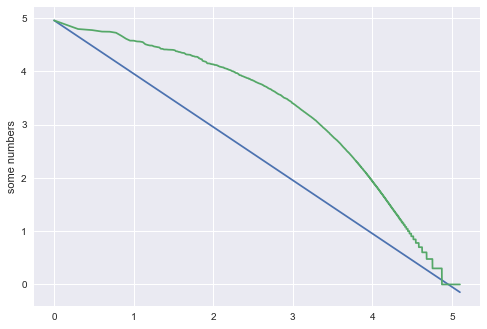

In [303]:
K = 0
avr = 0
plt.style.use("seaborn")
frequency = dict(sorted(frequency.items(), key=lambda kv: kv[1]))

for i, key in enumerate(frequency.keys()):
    avr = avr + frequency[key]
    if (i == len(frequency) -1):
        avr = avr + frequency[key]    
        K = frequency[key]
        break
list_c = []
real = []
nums = []
for i, key in enumerate(frequency.keys()):
        real.append(math.log10(frequency[key] ))
        cf_formula[key] = math.log10(K / (len(frequency) + 1 - (i+1)))
        list_c.append(math.log10(K / (len(frequency) + 1 - (i+1))))
        nums.append( math.log10(len(frequency) + 1 -(i+1)))

plt.plot(nums,cf_list)
plt.plot(nums,cf_accuall)

plt.show()

In [262]:
frequency = dict(sorted(frequency.items(), key=lambda kv: kv[1]))
K = 0
Sum = 0
print(sum(list(frequency5.values())))
print(sum(list(frequency15.values())))

1080312
3230429


In [299]:
#Zipf law
import seaborn as sns
import matplotlib.pyplot as plt
def frequency(diction):
    listoffrequency=[]
        #print value
    lengths = [len(v) for v in diction.values()]
    return lengths
    
    
list_frequency_first_sample=frequency(diction_sample5)    
    
list_frequency_secound_sample=frequency(diction_sample10)   
#term_freq_df=frequency(diction)   
term_freq_df1=pd.DataFrame(term_freq_df)
term_freq_df1['total']=term_freq_df

In [239]:
print(sum(list_frequency_first_sample),sum(list_frequency_secound_sample))

634906 1894815


In [226]:
from pylab import *
counts = term_freq_df1['total']
tokens = term_freq_df1.index


done


TypeError: can only concatenate str (not "int") to str

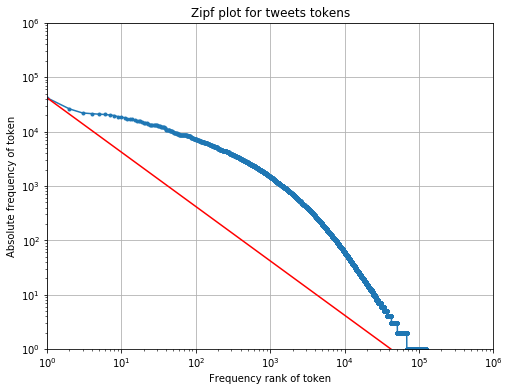

In [228]:
from pylab import *
counts = term_freq_df1.total
tokens = term_freq_df1.index
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]

plt.figure(figsize=(8,6))
plt.ylim(1,10**6)
plt.xlim(1,10**6)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')

title("Zipf plot for tweets tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    print("done")
    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")

In [105]:
pow(648639 ,1/2)
5000/pow(648639 ,1/2)

6.20823968468409

In [63]:
38323/m.pow(1000020,0.5)

38.32261677574835

In [65]:
m.pow(1000020,0.5)

1000.0099999500005

In [134]:
m.pow(635374,0.99)


555903.1625930083

In [271]:
import math as m 
def Heap_law(list_sample_5,list_sample_10):
    print(m.log(list_sample_5/list_sample_10,10))
    print(m.log(1/3,10)/m.log(list_sample_5/list_sample_10,10))

    b=(m.log(1/3,10))/(m.log(list_sample_5/list_sample_10),10)
    print(b)
    
    t =15000/(pow(sumof,b))
    return b,t


b,k=Heap_law(sum(list(frequency5.values())),sum(list(frequency15.values())))
print(b,k)

    

-0.47571100011927336
1.0029645196348949


TypeError: unsupported operand type(s) for /: 'float' and 'tuple'